# Exploratory Data Analysis 

In [ ]:
# Necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Load and Process Data

In [ ]:
# Load data
df_cars = pd.read_csv('cleaned_data_july_21st.csv')
print('Data loaded')

Data loaded


In [ ]:
# Print data statistics
print(df_cars.info()) 
print('\n')
print('Cars.com DataFrame:')
print(df_cars.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82895 entries, 0 to 82894
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Listing ID  82895 non-null  object
 1   Trim        82895 non-null  object
 2   Make        82895 non-null  object
 3   Year        82895 non-null  int64 
 4   Model       82895 non-null  object
 5   Price       82895 non-null  int64 
 6   Body Style  82895 non-null  object
 7   City        82895 non-null  object
 8   State       82895 non-null  object
 9   Mileage     82895 non-null  int64 
 10  Stock Type  82895 non-null  object
dtypes: int64(3), object(8)
memory usage: 7.0+ MB
None


Cars.com DataFrame:
                             Listing ID      Trim       Make  Year  \
0  f41e479e-4d07-42ba-850c-9f9dd21a0d2f  lt cloth  chevrolet  2020   
1  04de8d78-9d1a-407d-aa08-4259f598f589       1lt  chevrolet  2016   
2  0ceae6e2-43bd-4a6d-9eaf-ac5ae2a7a703    custom  chevrolet  2021   
3  c4c93e14-67

In [ ]:
# Drop irrelevant columns
df_cars.drop(columns=['Listing ID'], inplace=True) # Listing id's are irrelevant
df_cars.drop(columns=['Stock Type'], inplace=True) # All stock type is 'used' 
print('Updataed Cars.com DataFrame:')
print(df_cars.head())

Updataed Cars.com DataFrame:
       Trim       Make  Year           Model  Price    Body Style  \
0  lt cloth  chevrolet  2020        traverse  25988           suv   
1       1lt  chevrolet  2016  silverado 1500  23995  pickup truck   
2    custom  chevrolet  2021  silverado 1500  32980  pickup truck   
3       1lt  chevrolet  2018  silverado 1500  29250  pickup truck   
4        ls  chevrolet  2022           spark  13000     hatchback   

            City State  Mileage  
0     Pittsburgh    PA    51375  
1    Tallahassee    FL    98658  
2  East Hartford    CT    53326  
3      Caledonia    MI    40000  
4   St Augustine    FL    47825  


# Descriptive Statistics

#### Counts

In [ ]:
# Print counts
print(df_cars['Body Style'].value_counts()) 
print('\n')
print(df_cars['Make'].value_counts())
print('\n')
print(df_cars['State'].value_counts()) 

Body Style
suv              45284
sedan            16053
pickup truck     14679
hatchback         2919
coupe             1387
passenger van     1047
wagon              554
cargo van          537
convertible        366
minivan             69
Name: count, dtype: int64


Make
gmc          8692
jeep         8543
chevrolet    8468
ford         8393
kia          8349
nissan       8293
subaru       8218
hyundai      8176
toyota       8131
honda        7632
Name: count, dtype: int64


State
FL    7249
CA    6077
TX    6034
OH    4733
IL    3433
PA    3354
NY    3101
NC    2824
VA    2737
NJ    2655
IN    2601
GA    2580
TN    2397
MI    2285
WI    2272
AZ    2197
MN    2066
MD    2049
CO    1996
MO    1853
KY    1638
WA    1563
MA    1340
SC    1316
AL    1289
CT    1010
OR     922
NV     854
OK     830
IA     785
KS     748
UT     656
LA     642
NE     563
AR     546
NH     497
MS     443
ID     399
WV     387
NM     354
ND     352
DE     189
VT     183
MT     172
ME     168
RI     163
SD    

#### Summary Stats

In [ ]:
# Print summary statistics
print("Number of Rows and Columns:", df_cars.shape)
print("\n")

print("Summary Statistics:")
print(round(df_cars.describe(include='object'),1))
print("\n")
print(round(df_cars.describe(),1))

Number of Rows and Columns: (82895, 9)


Summary Statistics:
           Trim   Make        Model Body Style      City  State
count     82895  82895        82895      82895     82895  82895
unique      654     10          282         10      3212     51
top     limited    gmc  sierra 1500        suv  Columbus     FL
freq       5099   8692         2853      45284       617   7249


          Year     Price   Mileage
count  82895.0   82895.0   82895.0
mean    2019.6   26739.8   55752.9
std        3.1   13176.0   40646.7
min     2010.0    2000.0    1000.0
25%     2018.0   17995.0   24527.0
50%     2021.0   24385.0   45911.0
75%     2022.0   32488.0   79523.0
max     2024.0  148990.0  298263.0


#### Distributions

In [ ]:
# Print distribution counts
distribution = pd.crosstab(df_cars['Body Style'], df_cars['Make'])
distribution_percentage = pd.crosstab(df_cars['Body Style'], df_cars['Make'], normalize='columns') * 100

print(distribution,'\n\n', round(distribution_percentage,2))

Make           chevrolet  ford   gmc  honda  hyundai  jeep   kia  nissan  \
Body Style                                                                 
cargo van             77   254   121      0        0     0     0      85   
convertible          184   125     0      0        0    48     0       9   
coupe                557   405     0    185       31     0    13      53   
hatchback            192   124     0    495      330     0   879     127   
minivan                0     0     0     18        0     0     6       1   
passenger van         13     9     0    521        0     0   237      23   
pickup truck        3034  3381  4407    244      192   511     0    1137   
sedan                902   597     0   2657     2870     0  2746    2648   
suv                 3425  3476  4164   3511     4752  7984  4363    4201   
wagon                 84    22     0      1        1     0   105       9   

Make           subaru  toyota  
Body Style                     
cargo van           0  

#### Numerical Column Correlation

In [ ]:
# Numerical correlation matrix 
correlation_matrix = df_cars[['Price', 'Mileage', 'Year']].corr()
print("Correlation Matrix:\n", correlation_matrix)


Correlation Matrix:
             Price   Mileage      Year
Price    1.000000 -0.505268  0.560047
Mileage -0.505268  1.000000 -0.756246
Year     0.560047 -0.756246  1.000000


## Visualizing Data

### Histograms for Price, Mileage and Year

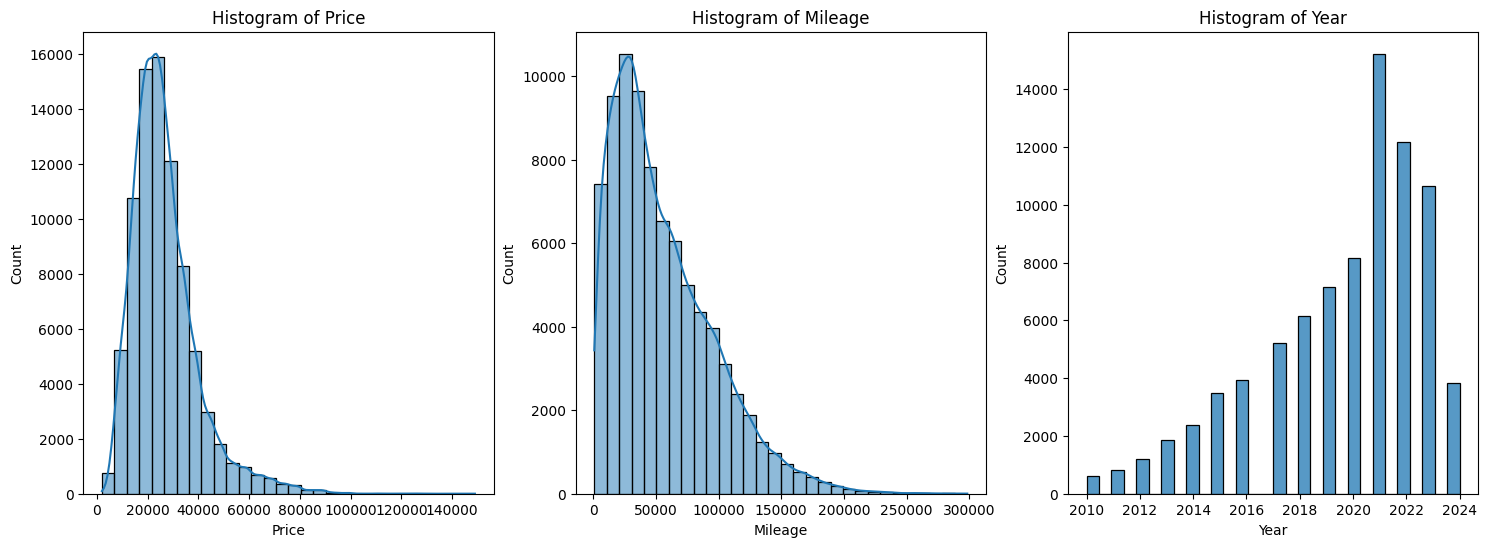

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.histplot(df_cars['Price'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Price')

sns.histplot(df_cars['Mileage'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Histogram of Mileage')

sns.histplot(df_cars['Year'], bins=30, kde=False, ax=axes[2])
axes[2].set_title('Histogram of Year')
plt.show()

### Boxplots

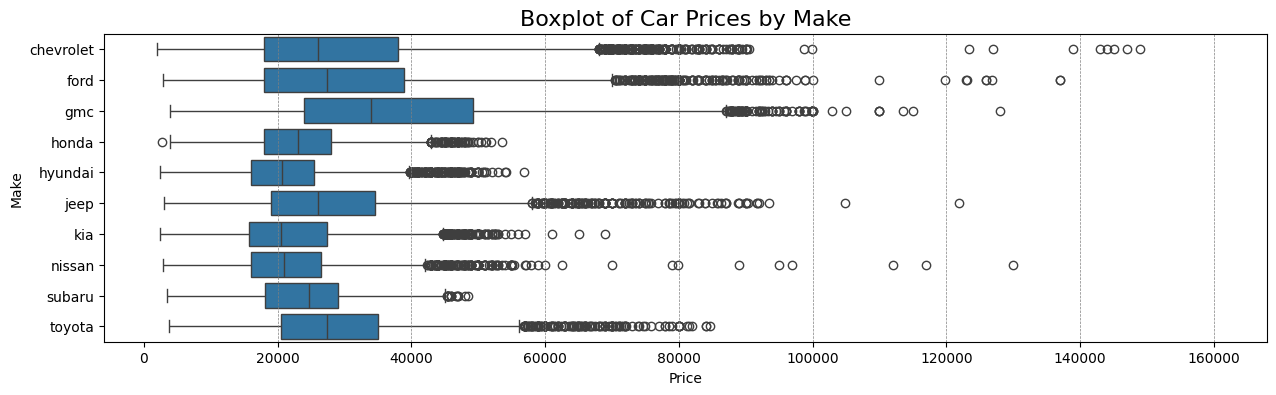

In [ ]:
plt.figure(figsize=(15, 4))
sns.boxplot(x="Price", y="Make", data=df_cars)
plt.title("Boxplot of Car Prices by Make", fontsize=16)

# Add vertical lines at each $20,000 interval
for price in range(20000, int(df_cars['Price'].max()) + 20000, 20000):
    plt.axvline(x=price, color='gray', linestyle='--', linewidth=0.5)

plt.show()

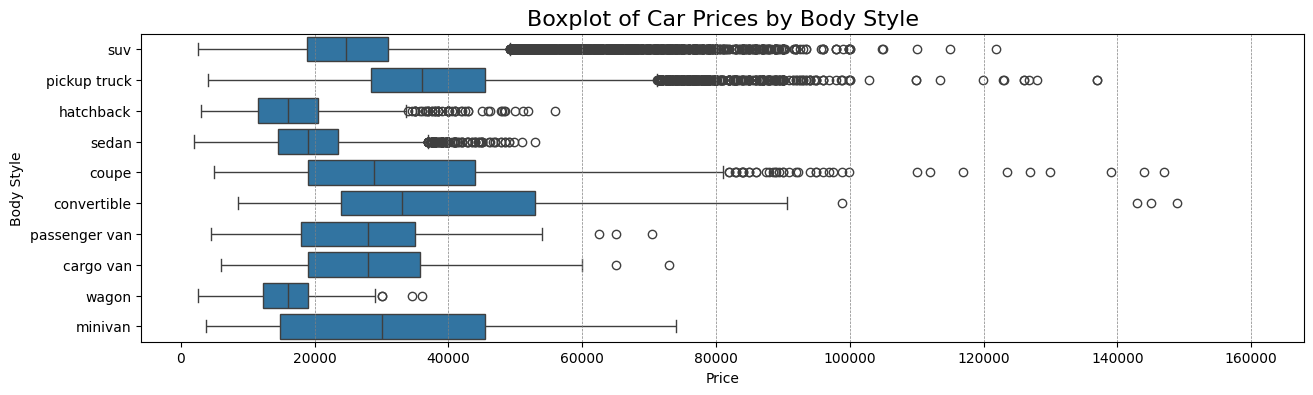

In [ ]:
plt.figure(figsize=(15, 4))
sns.boxplot(x="Price", y="Body Style", data=df_cars)
plt.title("Boxplot of Car Prices by Body Style", fontsize=16)

# Add vertical lines at each $20,000 interval
for price in range(20000, int(df_cars['Price'].max()) + 20000, 20000):
    plt.axvline(x=price, color='gray', linestyle='--', linewidth=0.5)

plt.show()

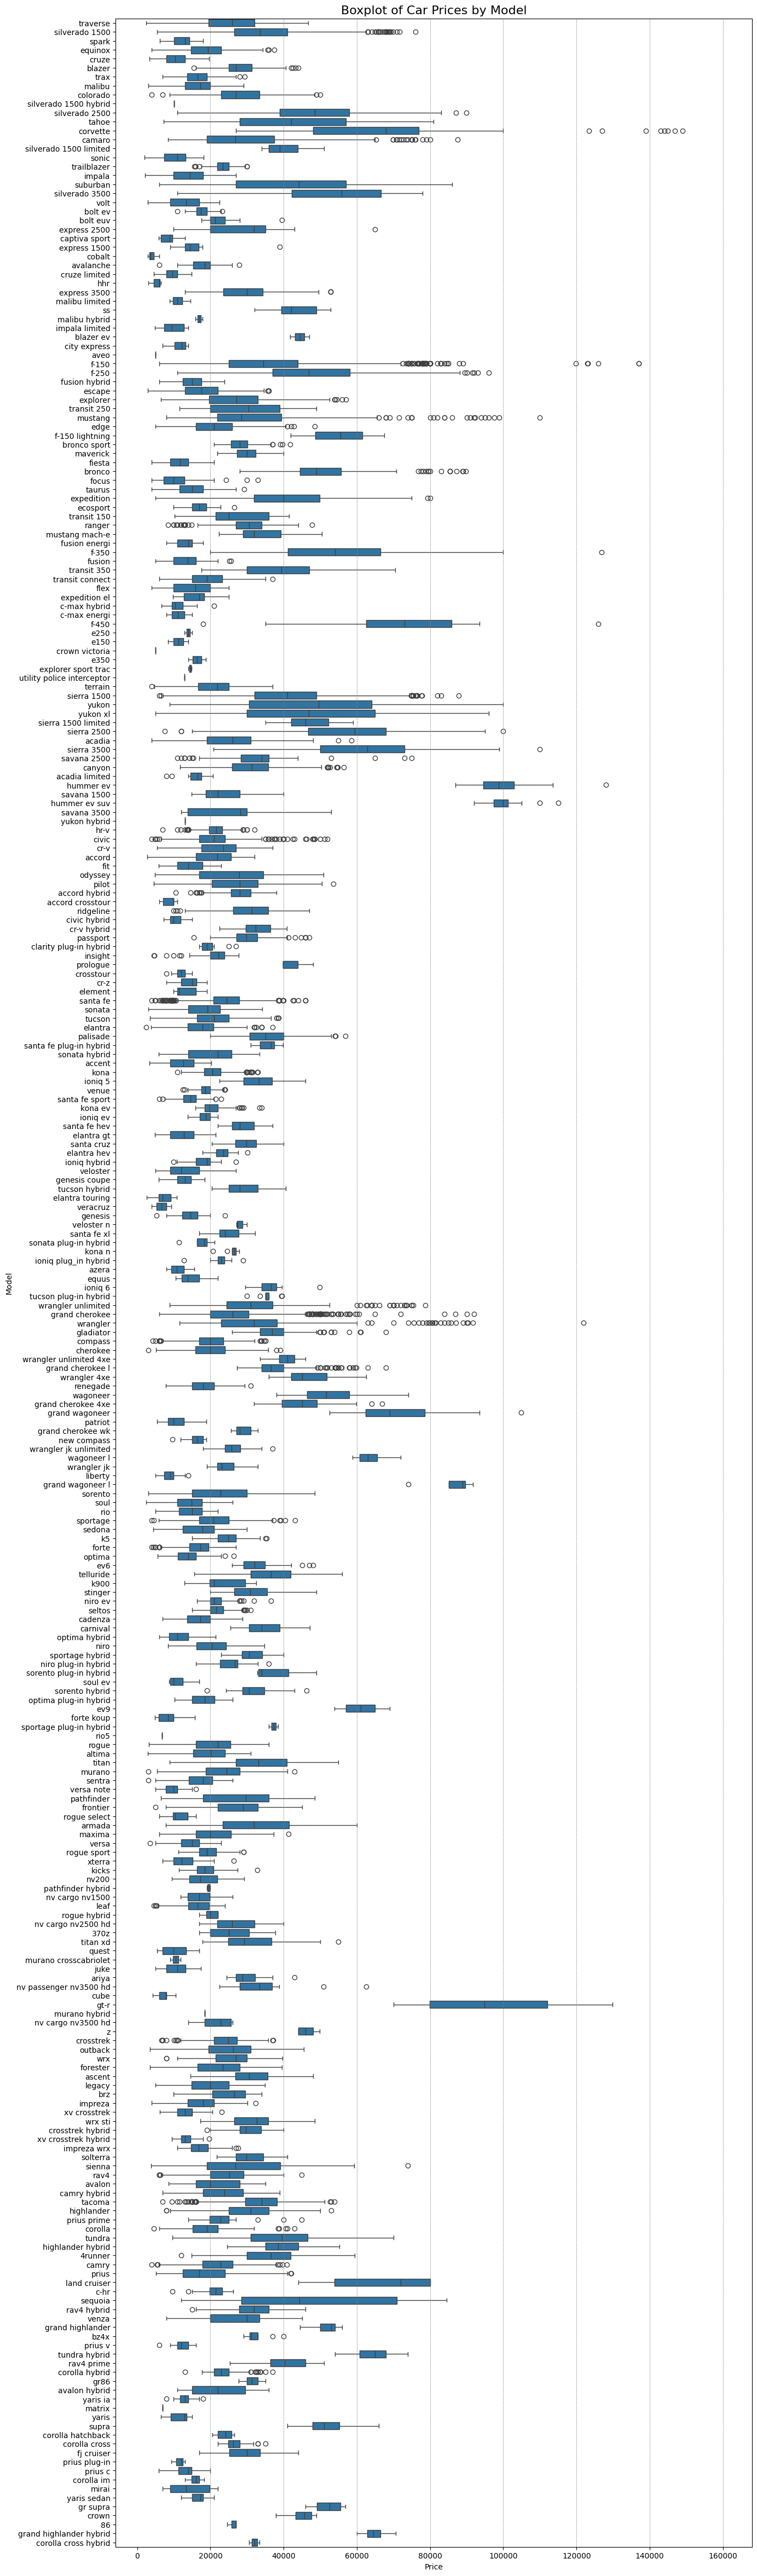

In [ ]:
plt.figure(figsize=(15, 60))  
sns.boxplot(x="Price", y="Model", data=df_cars)
plt.title("Boxplot of Car Prices by Model", fontsize=16)

for price in range(20000, int(df_cars['Price'].max()) + 20000, 20000):
    plt.axvline(x=price, color='gray', linestyle='--', linewidth=0.5)

plt.show()

### Distribution Heatmaps

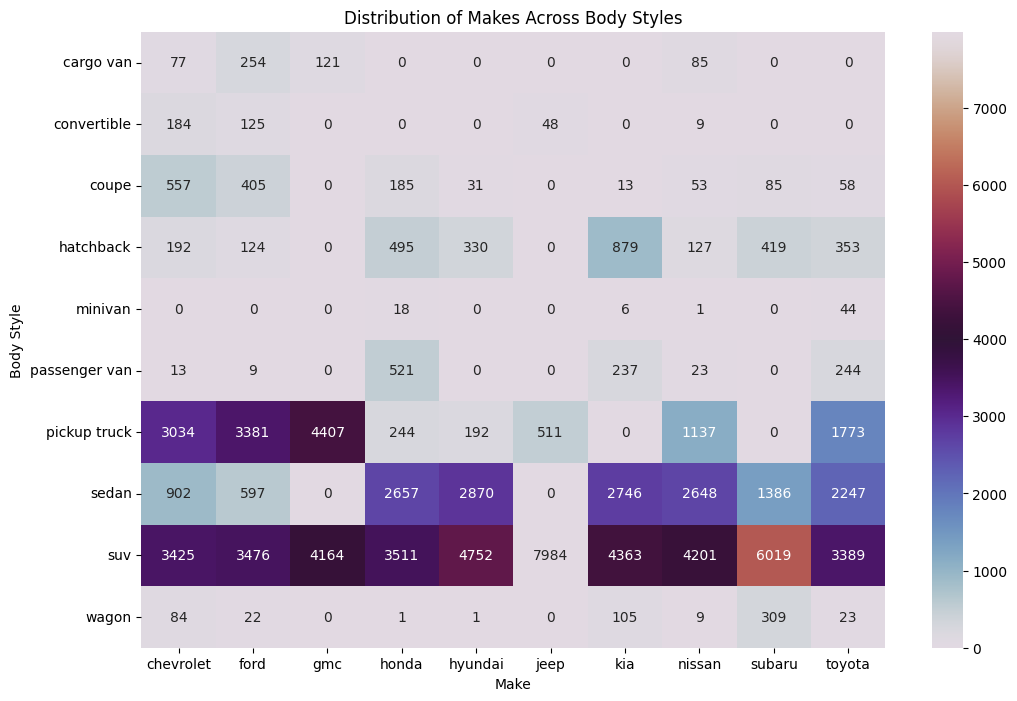

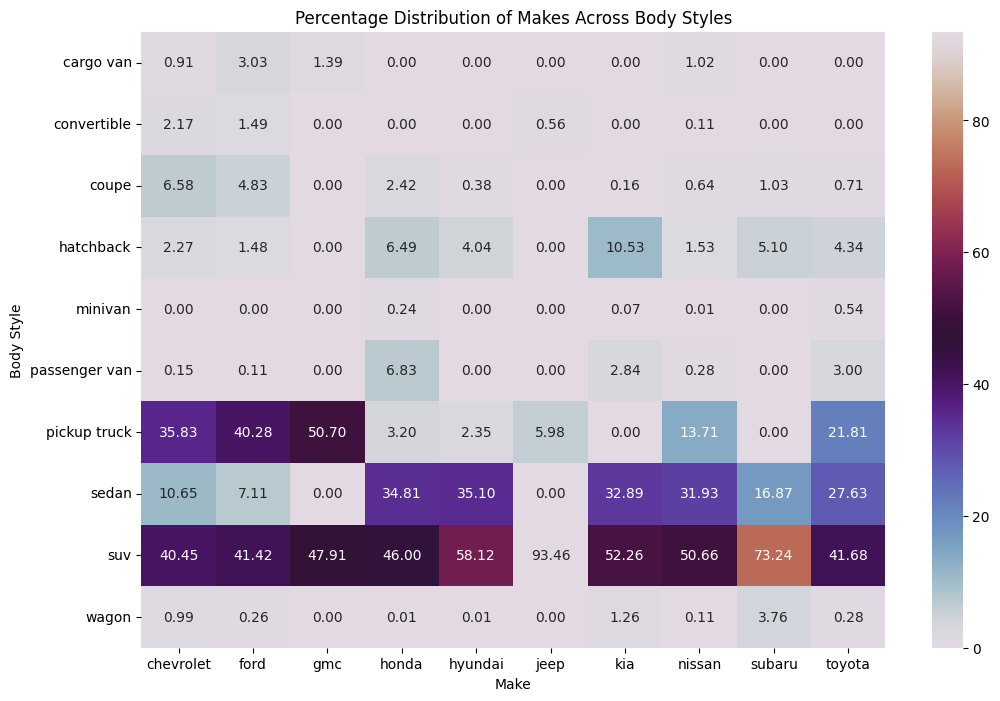

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(distribution, annot=True, fmt="d", cmap="twilight")
plt.title("Distribution of Makes Across Body Styles")

plt.figure(figsize=(12, 8))
sns.heatmap(distribution_percentage, annot=True, fmt=".2f", cmap="twilight")
plt.title("Percentage Distribution of Makes Across Body Styles")

plt.show()

#### Covariance Matrix

In [ ]:
cov_matrix = df_cars[['Price', 'Mileage', 'Year']].cov()
print("Covariance Matrix:\n", cov_matrix)


Covariance Matrix:
                 Price       Mileage          Year
Price    1.736058e+08 -2.706007e+08  23214.860188
Mileage -2.706007e+08  1.652152e+09 -96704.653465
Year     2.321486e+04 -9.670465e+04      9.897340


## Depreciation per Year by Make

chevrolet: Depreciation Rate = -2743.07 dollars/year
ford: Depreciation Rate = -3130.62 dollars/year
gmc: Depreciation Rate = -4148.82 dollars/year
honda: Depreciation Rate = -1837.95 dollars/year
hyundai: Depreciation Rate = -1958.77 dollars/year
jeep: Depreciation Rate = -2745.0 dollars/year
kia: Depreciation Rate = -2263.57 dollars/year
nissan: Depreciation Rate = -1838.41 dollars/year
subaru: Depreciation Rate = -2001.37 dollars/year
toyota: Depreciation Rate = -2087.04 dollars/year


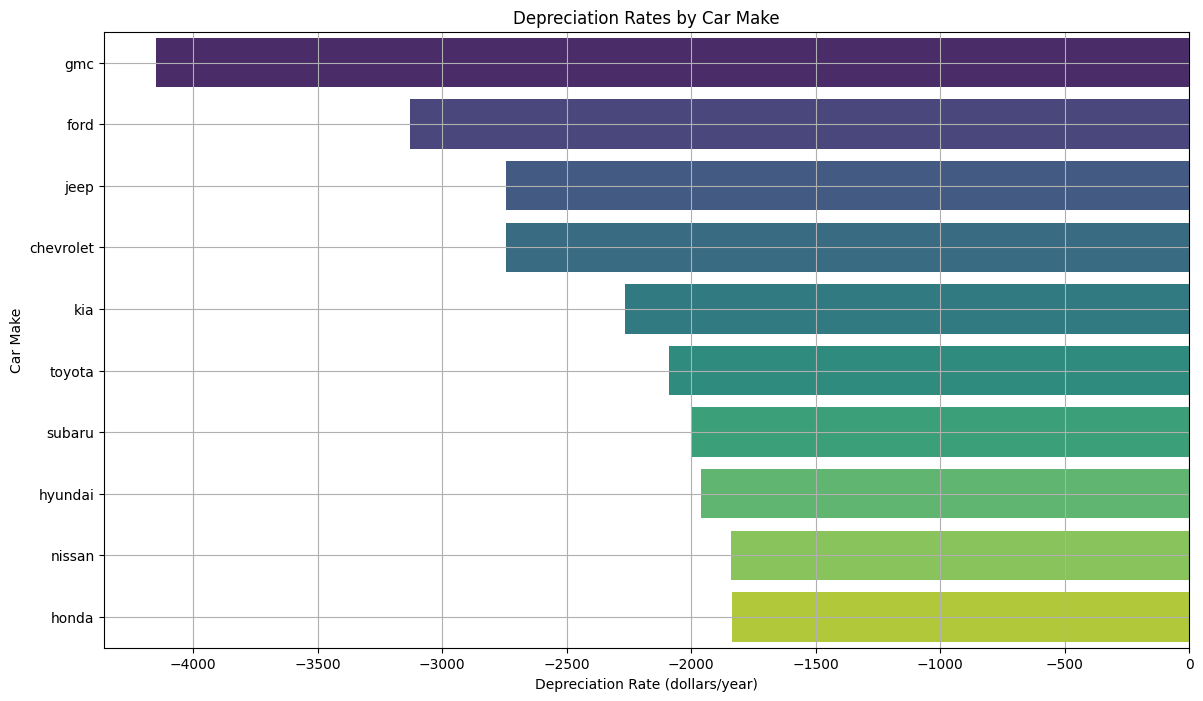

In [ ]:
df_cars['Car Age'] = 2024 - df_cars['Year']

makes = df_cars['Make'].unique()
depreciation_rates = {}

for make in makes:
    make_df = df_cars[df_cars['Make'] == make]
    X = make_df['Car Age'].values.reshape(-1, 1)
    y = make_df['Price'].values
    
    model = LinearRegression()
    model.fit(X, y)
    
    depreciation_rates[make] = {'model': model, 'slope': model.coef_[0], 'intercept': model.intercept_}

depreciation_data = []
for make, results in depreciation_rates.items():
    slope = round(results['slope'], 2)
    depreciation_data.append((make, slope))
    print(f"{make}: Depreciation Rate = {slope} dollars/year")

depreciation_df = pd.DataFrame(depreciation_data, columns=['Make', 'Depreciation Rate'])

depreciation_df = depreciation_df.sort_values(by='Depreciation Rate')

plt.figure(figsize=(14, 8))
sns.barplot(x='Depreciation Rate', y='Make', data=depreciation_df, hue='Make', palette='viridis')
plt.title('Depreciation Rates by Car Make')
plt.xlabel('Depreciation Rate (dollars/year)')
plt.ylabel('Car Make')
plt.grid(True)
plt.show()


In [ ]:
# Function to find outliers using the Interquartile Range (IQR) method
def find_outliers_iqr(df, column_name):
    """
    Identifies outliers in a specified column using the Interquartile Range (IQR) method.
    """
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

# Function to find outliers using the Z-score method
def find_outliers_zscore(df, column_name):
    """
    Identifies outliers in a specified column using the Z-score method.
    """
    z_scores = np.abs(zscore(df[column_name]))
    return df[z_scores > 3]
# Find outliers in 'Price' and 'Mileage' using IQR method
price_outliers = find_outliers_iqr(df_cars, 'Price')
mileage_outliers = find_outliers_iqr(df_cars, 'Mileage')

# Find outliers in 'Price' and 'Mileage' using Z-score method
price_outliers_z = find_outliers_zscore(df_cars, 'Price')
mileage_outliers_z = find_outliers_zscore(df_cars, 'Mileage')

print(f"Number of price outliers (IQR): {len(price_outliers)}")
print(f"Number of mileage outliers (IQR): {len(mileage_outliers)}")
print(f"Number of price outliers (Z-score): {len(price_outliers_z)}")
print(f"Number of mileage outliers (Z-score): {len(mileage_outliers_z)}")

Number of price outliers (IQR): 3613
Number of mileage outliers (IQR): 1598
Number of price outliers (Z-score): 1529
Number of mileage outliers (Z-score): 860
